In [20]:
import pandas as pd

data = pd.read_csv('drive/MyDrive/poisson_ratio.csv')
print('Dataset shape:', data.shape)
data.describe()

Dataset shape: (10880, 274)


,mean_EffectiveCoordination,var_EffectiveCoordination,min_EffectiveCoordination,max_EffectiveCoordination,var_MeanBondLength,min_MeanBondLength,max_MeanBondLength,mean_BondLengthVariation,var_BondLengthVariation,min_BondLengthVariation,...,min_SpaceGroupNumber,most_SpaceGroupNumber,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,poisson_ratio
count,10877.000000,1.087700e+04,10877.000000,10877.000000,1.087700e+04,10877.000000,10877.000000,10877.000000,1.087700e+04,10877.000000,...,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,10.310737,9.755057e-01,8.813405,11.730888,4.028916e-02,0.928772,1.057819,0.080782,2.443973e-02,0.040415,...,123.244577,153.108390,0.250424,0.172565,0.402551,0.174460,0.345221,0.297367,0.119201,0.292285
std,1.936388,9.403318e-01,2.607586,2.676771,4.007018e-02,0.086971,0.064579,0.053081,2.533387e-02,0.040768,...,80.976183,79.974361,0.151985,0.177344,0.247948,0.221406,0.475462,0.262462,0.111233,0.102537
min,4.021817,0.000000e+00,3.939236,4.021817,0.000000e+00,0.394960,1.000000,0.000000,0.000000e+00,0.000000,...,2.000000,2.000000,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.960000
25%,9.196184,3.108624e-15,6.000073,10.736894,1.804112e-16,0.894009,1.000000,0.051982,9.497611e-17,0.006319,...,15.000000,70.000000,0.146758,0.021277,0.215110,0.000000,0.000000,0.091627,0.033514,0.250000
50%,10.834351,8.763590e-01,8.656341,11.956922,3.725710e-02,0.957601,1.043284,0.067347,1.906284e-02,0.037599,...,166.000000,194.000000,0.214286,0.111111,0.400000,0.000000,0.000000,0.209607,0.078228,0.300000
75%,11.956922,1.812433e+00,11.956922,12.366356,7.008816e-02,1.000000,1.096640,0.107681,4.166376e-02,0.051982,...,194.000000,225.000000,0.310345,0.285714,0.603448,0.354839,1.000000,0.455779,0.186163,0.340000
max,13.123931,5.021184e+00,12.000000,24.648726,2.234073e-01,1.000000,1.436630,0.540254,1.491243e-01,0.458302,...,229.000000,229.000000,1.000000,0.708333,0.972222,0.857143,1.000000,0.921450,0.460725,0.500000


In [2]:
from sklearn.utils import shuffle

features = list(data)[2:-1]
properties = list(data)[-1]
data = shuffle(data, random_state=0)
X = data[features]
y = data[properties]
print('number of features:', len(features))

number of features: 271


In [3]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

reg = RandomForestRegressor(n_estimators=10, random_state=100)
scores = cross_val_score(reg, X, y, cv=5)

scores.mean()

0.07524418893196028

In [4]:
from sklearn.feature_selection import VarianceThreshold

sel =  VarianceThreshold(threshold=(0.95*(1-0.95)))
X_sel = sel.fit_transform(X)

feature_index = sel.get_support()
print('number of features after remove redundant ones:',sum(feature_index))

final_features=[]

for i in range(len(features)):
    if feature_index[i]==True:
        final_features.append(features[i])

number of features after remove redundant ones: 240


In [5]:
# Task8.2.1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_sel)

X_sc = scaler.transform(X_sel)

print('X shape:', X_sc.shape)

X shape: (10880, 240)


In [6]:
from scipy.stats import spearmanr
corr = spearmanr(X_sc).correlation
print(corr.shape)

(240, 240)


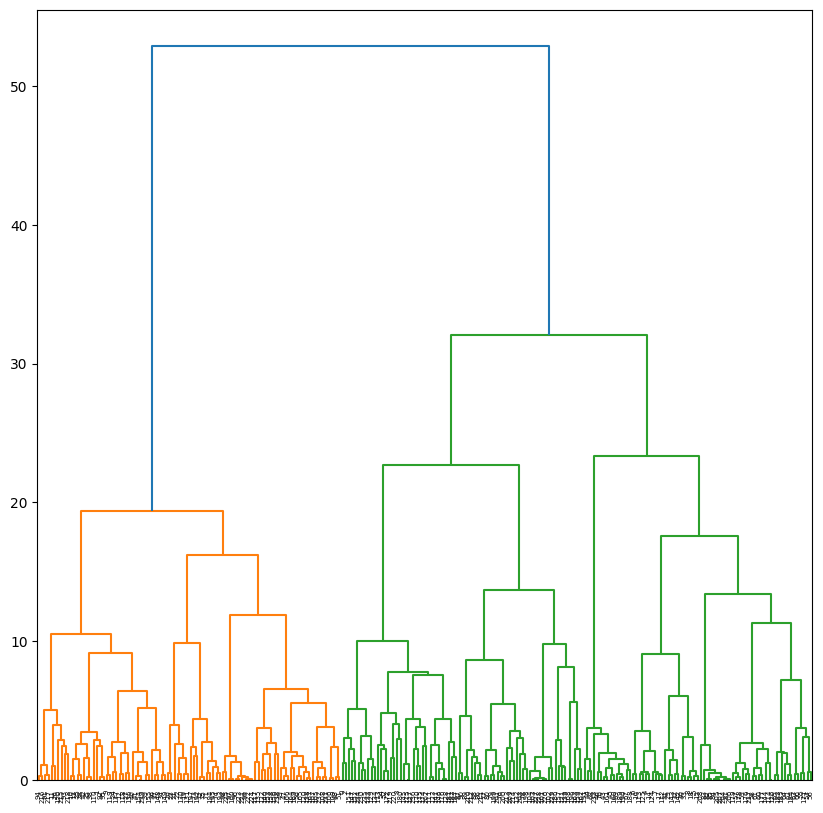

In [7]:
# Task8.2.2

import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

corr = np.nan_to_num(corr, nan=np.nanmean(corr))
corr_linkage = hierarchy.ward(corr)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10,10))
dendro = hierarchy.dendrogram(corr_linkage, ax=ax)

plt.show()

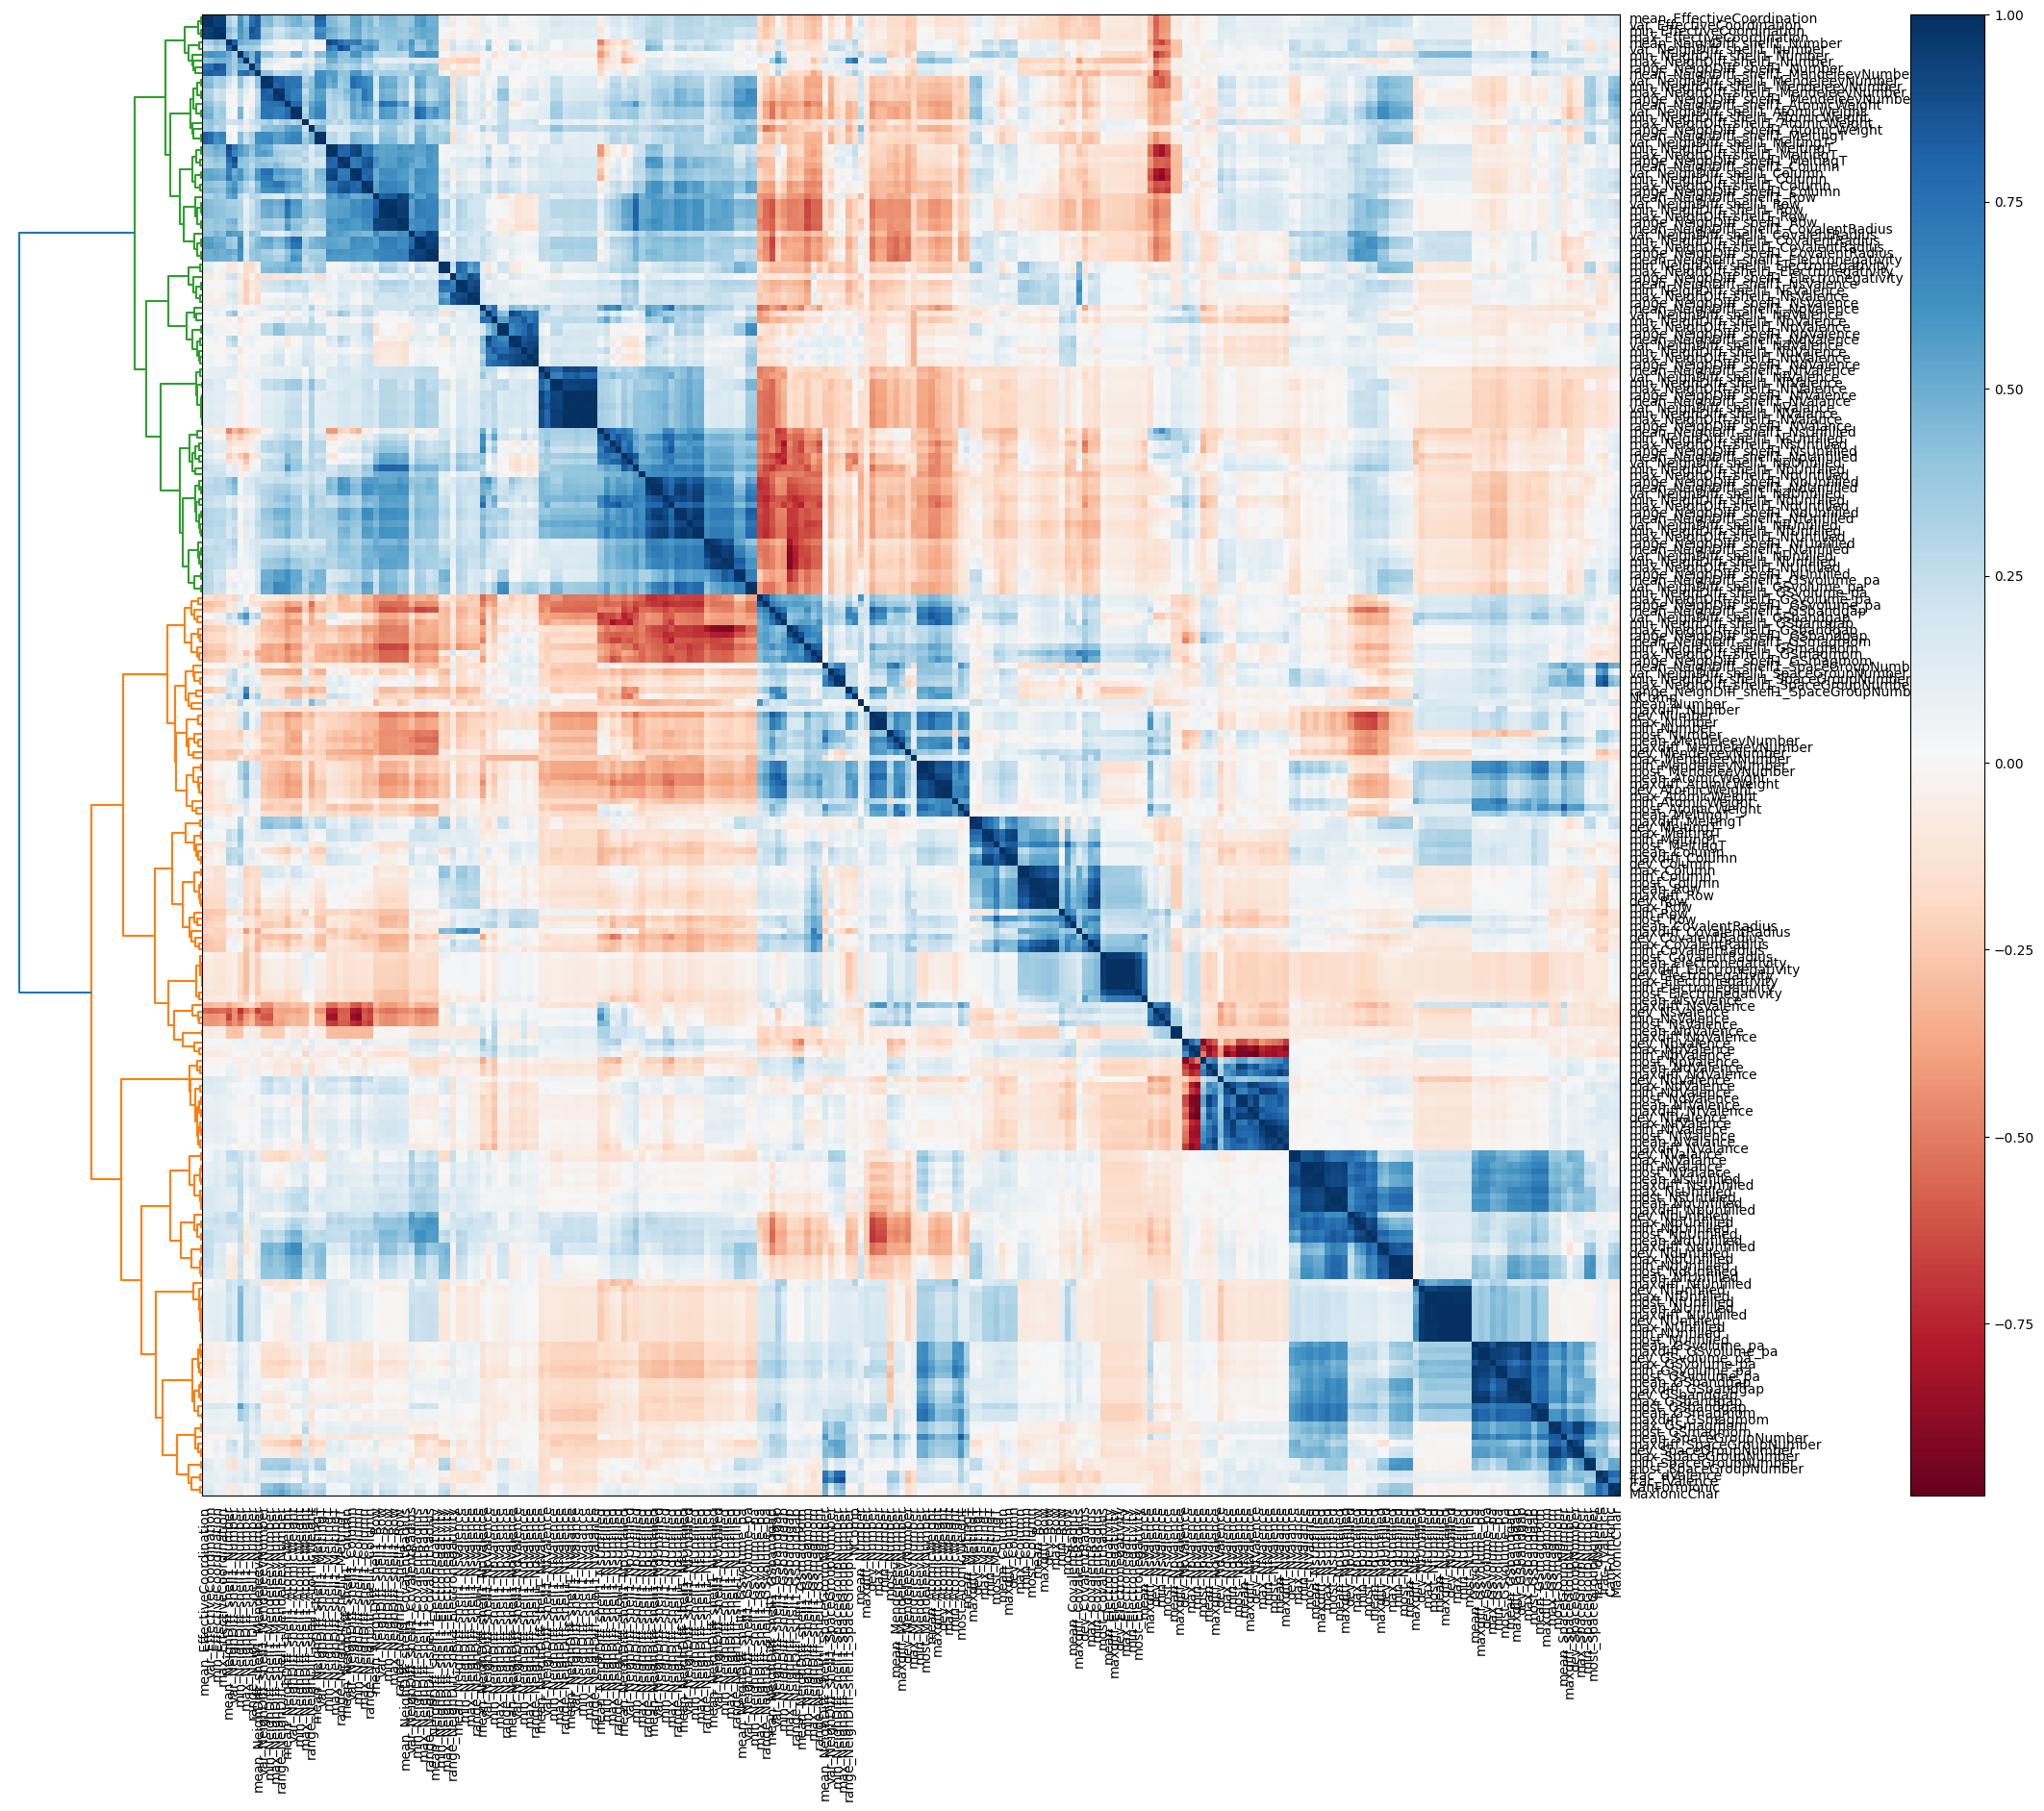

In [8]:
import numpy as np
import numpy as np

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))

main_axes = plt.gca()
divider = make_axes_locatable(main_axes)

plt.sca(divider.append_axes("left", 2.0, pad=0))

ydendro = hierarchy.dendrogram(corr_linkage, orientation='left', no_labels=True, distance_sort='descending')
plt.gca().set_axis_off()
plt.sca(main_axes)

img=plt.imshow(corr[dendro['leaves'], :][:, dendro['leaves']],aspect='auto', interpolation='none', cmap='RdBu')

plt.colorbar(pad=0.13)
plt.gca().yaxis.tick_right()
plt.xticks(range(len(final_features)),final_features,rotation=90)
plt.yticks(range(len(final_features)),final_features)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')

plt.show()

In [9]:
# Task8.3

cluster_ids = hierarchy.fcluster(corr_linkage, t=2, criterion='distance')

from collections import defaultdict
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
print(cluster_id_to_feature_ids)

print(cluster_id_to_feature_ids.values())

selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
print(selected_features)
print('number of features after correlation reduction:',len(selected_features))

defaultdict(<class 'list'>, {32: [0, 2], 9: [1], 41: [3], 71: [4, 14, 113, 125], 76: [5, 8, 15, 18], 70: [6, 16], 72: [7, 17, 112, 124], 11: [9, 24, 119, 137], 6: [10, 13, 25, 28], 2: [11, 26], 12: [12, 27, 118, 136], 18: [19, 22, 130, 131], 17: [20, 23], 19: [21], 73: [29, 32, 142, 143], 75: [30, 33], 74: [31], 15: [34, 37, 148, 149], 7: [35, 38, 42], 16: [36], 13: [39, 41, 154, 155, 239], 14: [40], 68: [43, 45, 46, 67, 69, 70, 160, 161, 188, 189, 190], 67: [44, 68, 191], 28: [47, 49, 50, 120, 138, 164, 165, 166, 167, 169], 31: [48, 51], 37: [52, 172], 86: [53, 56], 38: [54], 85: [55, 171], 79: [57, 59, 176, 178, 179, 237], 80: [58, 60, 61, 177], 83: [62, 64, 184, 185], 84: [63, 66], 82: [65, 183], 23: [71, 74, 193, 194, 195], 22: [72, 75], 20: [73, 192], 56: [76, 79, 199, 200, 201], 55: [77, 80], 59: [78, 198, 203], 77: [81, 82, 83, 84, 85, 204, 205, 206, 207], 54: [86, 88, 211, 212], 52: [87, 90], 53: [89, 210], 1: [91, 94, 216, 217], 8: [92, 95], 3: [93, 218], 24: [96, 97, 98, 99, 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=10, random_state=0)
X_train=X_train[:,selected_features]
X_test=X_test[:,selected_features]

In [11]:
#Task 8.4.1

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

skb = SelectKBest(score_func=f_regression)
est_rf = RandomForestRegressor(random_state=0)
pipe_rf = Pipeline([('SKB', skb), ('forest', est_rf)])

num_features = X_train.shape[1]

param_grid_rf = {
    'SKB__k': [10, 20, num_features],
    'forest__n_estimators': [10, 50, 100],
    'forest__max_depth': [None, 10, 20],
    'forest__max_features': ['sqrt', 1.0],
    'forest__min_samples_leaf': [1, 2, 4]
}

gcv_rf = GridSearchCV(estimator = pipe_rf , param_grid = param_grid_rf, cv = 4,return_train_score=True)
gcv_rf.fit(X_train, y_train)
print('\nRandomForest:', gcv_rf.best_score_)
print(gcv_rf.best_params_)


RandomForest: 0.20825010410225625
{'SKB__k': 86, 'forest__max_depth': None, 'forest__max_features': 'sqrt', 'forest__min_samples_leaf': 4, 'forest__n_estimators': 100}


In [12]:
#Task 8.4.2
est_rf = RandomForestRegressor(random_state=0, max_features='sqrt',n_estimators= 100 , max_depth= None, min_samples_leaf= 4)

best_results=-10
best_state=-1

for i in range (10):
    X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=20, random_state=i)
    X_train=X_train[:,selected_features]
    X_test=X_test[:,selected_features]
    est_rf.fit(X_train,y_train)
    result=est_rf.score(X_test, y_test)
    if result>best_results:
        best_results=result
        best_state=i

print(best_results,best_state)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=20, random_state=best_state)
X_train=X_train[:,selected_features]
X_test=X_test[:,selected_features]

0.5741349578091185 3


In [13]:
# Task8.5

from sklearn.inspection import permutation_importance

result = permutation_importance(est_rf, X_train,y_train , n_repeats=10, random_state=0, n_jobs=2)
perm_sorted_idx = result.importances_mean.argsort()

<ipython-input-14-d475e355db68>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)


['mean_EffectiveCoordination', 'var_EffectiveCoordination', 'min_EffectiveCoordination', 'max_EffectiveCoordination', 'mean_NeighDiff_shell1_Number', 'var_NeighDiff_shell1_Number', 'min_NeighDiff_shell1_Number', 'max_NeighDiff_shell1_Number', 'range_NeighDiff_shell1_Number', 'mean_NeighDiff_shell1_MendeleevNumber', 'var_NeighDiff_shell1_MendeleevNumber', 'min_NeighDiff_shell1_MendeleevNumber', 'max_NeighDiff_shell1_MendeleevNumber', 'range_NeighDiff_shell1_MendeleevNumber', 'mean_NeighDiff_shell1_AtomicWeight', 'var_NeighDiff_shell1_AtomicWeight', 'min_NeighDiff_shell1_AtomicWeight', 'max_NeighDiff_shell1_AtomicWeight', 'range_NeighDiff_shell1_AtomicWeight', 'mean_NeighDiff_shell1_MeltingT', 'var_NeighDiff_shell1_MeltingT', 'min_NeighDiff_shell1_MeltingT', 'max_NeighDiff_shell1_MeltingT', 'range_NeighDiff_shell1_MeltingT', 'mean_NeighDiff_shell1_Column', 'var_NeighDiff_shell1_Column', 'min_NeighDiff_shell1_Column', 'max_NeighDiff_shell1_Column', 'range_NeighDiff_shell1_Column', 'mean_N

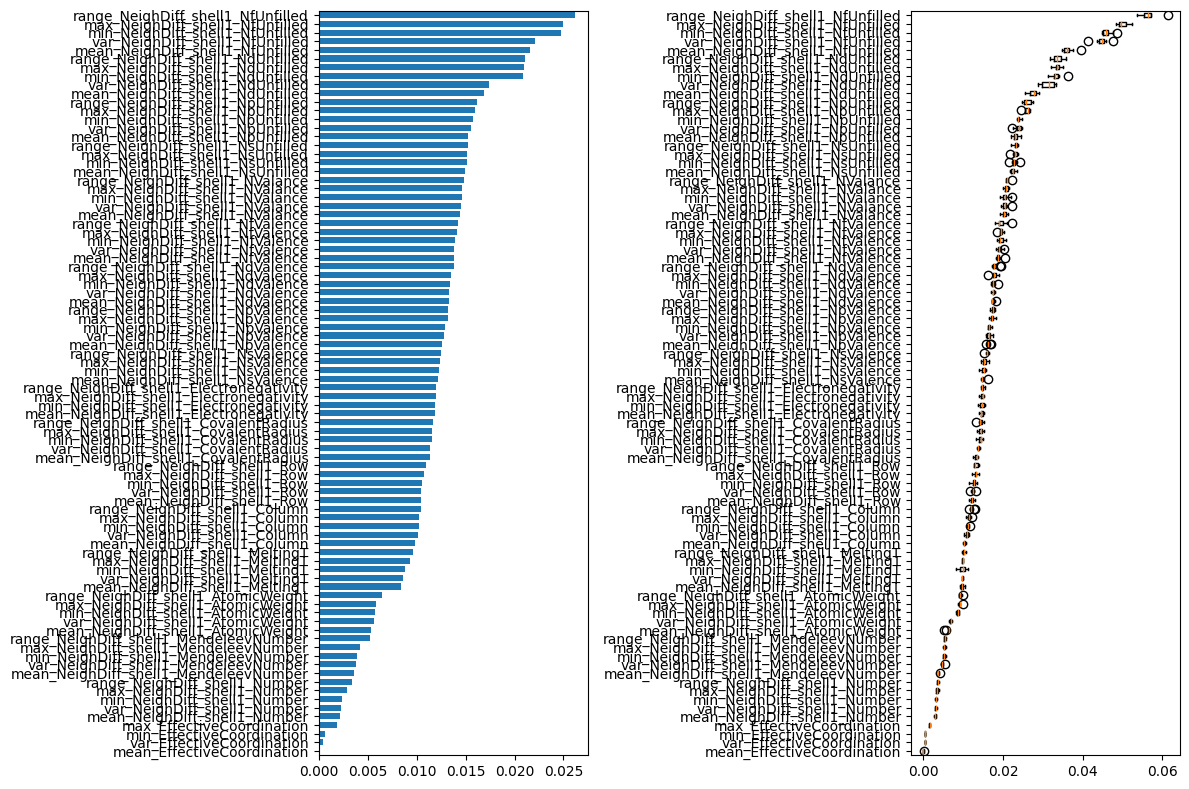

In [14]:
tree_importance_sorted_idx = np.argsort(est_rf.feature_importances_)
tree_indices = np.arange(0, len(est_rf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, est_rf.feature_importances_[tree_importance_sorted_idx], height=0.7)

ylabels=[]
for i in range(len(tree_importance_sorted_idx)):
    ylabels.append(final_features[i])

ax1.set_yticklabels(ylabels)
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(est_rf.feature_importances_)))

labels=[]
for i in range(len(perm_sorted_idx)):
    labels.append(final_features[i])

print(labels,tree_importance_sorted_idx,est_rf.feature_importances_)

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=labels)
fig.tight_layout()
plt.show()

In [17]:
from sklearn.feature_selection import SelectFromModel

# Create a random forest regressor
ref = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)

# Train the classifier
ref.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature, importance in zip(final_features, ref.feature_importances_):
    print(feature, importance)

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(ref, threshold=0.05)

# Train the selector
sfm.fit(X_train, y_train)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(final_features[feature_list_index])

# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

final_index = sfm.get_support(indices=True)
print(final_index)
print([final_features[i] for i in final_index])

mean_EffectiveCoordination 0.0278596950242512
var_EffectiveCoordination 0.013229264682652684
min_EffectiveCoordination 0.017795646131739135
max_EffectiveCoordination 0.010655336308004536
mean_NeighDiff_shell1_Number 0.009277357863747103
var_NeighDiff_shell1_Number 0.014589592158411773
min_NeighDiff_shell1_Number 0.012822621111807393
max_NeighDiff_shell1_Number 0.017040434549733398
range_NeighDiff_shell1_Number 0.01663365392954893
mean_NeighDiff_shell1_MendeleevNumber 0.016613711826303994
var_NeighDiff_shell1_MendeleevNumber 0.012270107129649344
min_NeighDiff_shell1_MendeleevNumber 0.017223464692460933
max_NeighDiff_shell1_MendeleevNumber 0.019537735811861273
range_NeighDiff_shell1_MendeleevNumber 0.016914391394427054
mean_NeighDiff_shell1_AtomicWeight 0.013010603671480207
var_NeighDiff_shell1_AtomicWeight 0.009149736816954671
min_NeighDiff_shell1_AtomicWeight 0.010963983939282234
max_NeighDiff_shell1_AtomicWeight 0.017839356478907043
range_NeighDiff_shell1_AtomicWeight 0.01876176089779

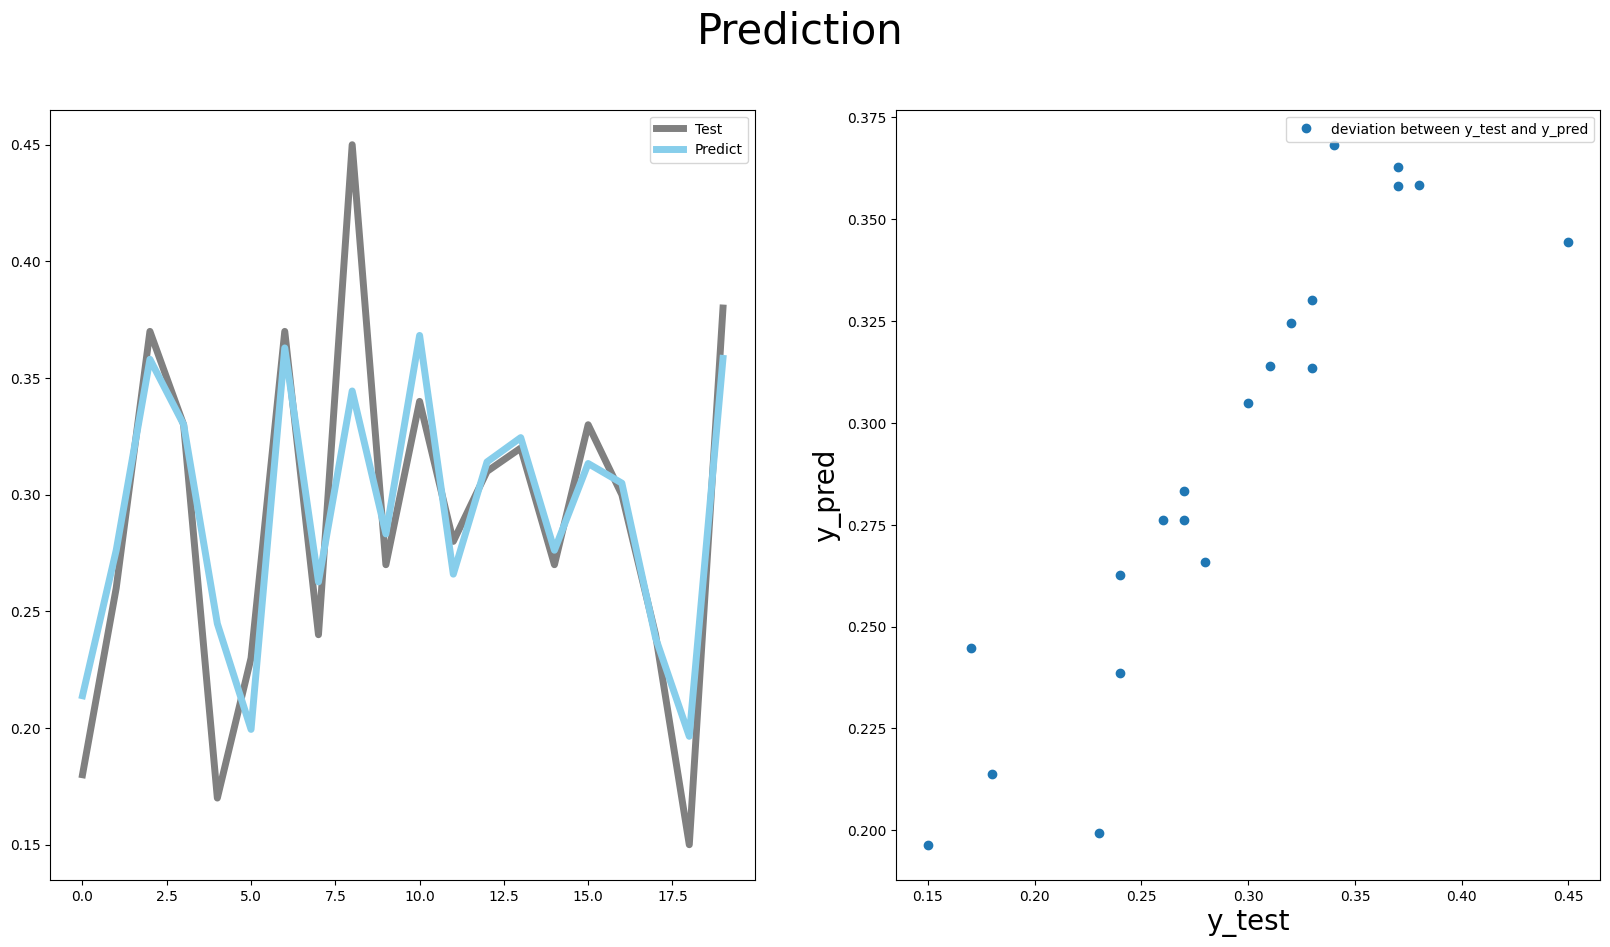

In [18]:
y_pred= est_rf.predict(X_test)

fig, ax=plt.subplots(1, 2, figsize=(20,10))

fig.suptitle("Prediction", fontsize=30)
ax[0].plot(range(len(y_test)), y_test, color='grey',linewidth=5, label='Test')
ax[0].plot(range(len(y_pred)), y_pred, color='skyblue',linewidth=5, label='Predict')
ax[0].legend(fontsize= 10)

ax[1].plot(y_test, y_pred, 'o', label='deviation between y_test and y_pred')
ax[1].set_xlabel('y_test', fontsize=20)
ax[1].set_ylabel('y_pred', fontsize=20)
ax[1].legend(fontsize= 10)

plt.show()

In [22]:
# Task 9 Uncertainty estimation

from sklearn.utils import resample
import numpy as np

# Number of bootstrap samples to create
n_iterations = 10

# Dataframe for storing predicted values
y_preds = pd.DataFrame()

for i in range(n_iterations):
    # Prepare train and test sets
    X_train_resampled, y_train_resampled = resample(X_train, y_train)

    # Fit model
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_test)
    y_preds[i] = y_pred

# Calculate standard deviations of predictions
prediction_std = y_preds.std(axis=1)

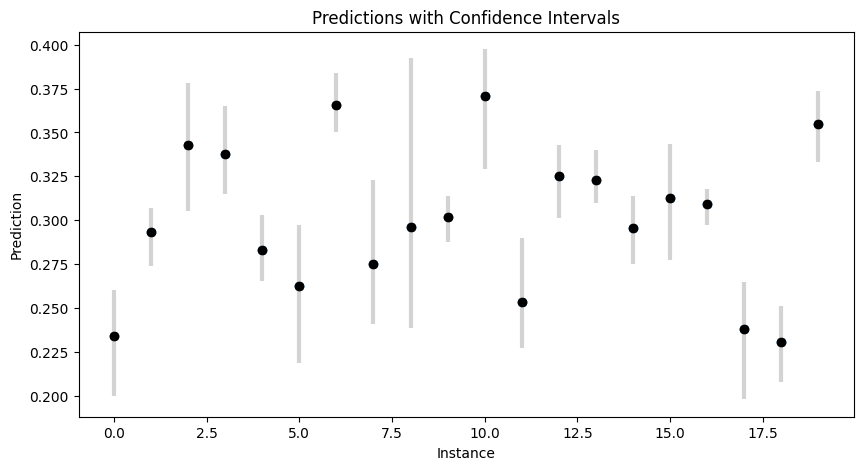

In [26]:
# Calculate 95% confidence intervals for each prediction
lower_bounds = y_preds.apply(lambda row: np.percentile(row, 2.5), axis=1)
upper_bounds = y_preds.apply(lambda row: np.percentile(row, 97.5), axis=1)

# Create a DataFrame to store the lower and upper bounds
confidence_intervals = pd.DataFrame({'lower': lower_bounds, 'upper': upper_bounds})

# Calculate the mean prediction for each instance
mean_predictions = y_preds.mean(axis=1)

# Plot the mean predictions along with the confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(mean_predictions, 'o')
plt.errorbar(range(len(mean_predictions)), mean_predictions, yerr=[upper_bounds - mean_predictions, mean_predictions - lower_bounds], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.title('Predictions with Confidence Intervals')
plt.xlabel('Instance')
plt.ylabel('Prediction')
plt.show()

In [24]:
# Task 9 Uncertainty estimation

from sklearn.utils import resample
import numpy as np

# Number of bootstrap samples to create
n_iterations = 100

# Dataframe for storing predicted values
y_preds = pd.DataFrame()

for i in range(n_iterations):
    # Prepare train and test sets
    X_train_resampled, y_train_resampled = resample(X_train, y_train)

    # Fit model
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_test)
    y_preds[i] = y_pred

# Calculate standard deviations of predictions
prediction_std = y_preds.std(axis=1)

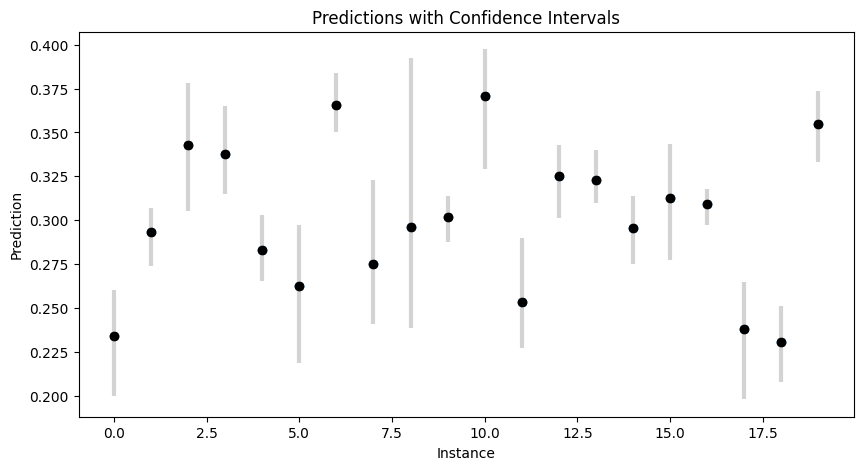

In [25]:
# Calculate 95% confidence intervals for each prediction
lower_bounds = y_preds.apply(lambda row: np.percentile(row, 2.5), axis=1)
upper_bounds = y_preds.apply(lambda row: np.percentile(row, 97.5), axis=1)

# Create a DataFrame to store the lower and upper bounds
confidence_intervals = pd.DataFrame({'lower': lower_bounds, 'upper': upper_bounds})

# Calculate the mean prediction for each instance
mean_predictions = y_preds.mean(axis=1)

# Plot the mean predictions along with the confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(mean_predictions, 'o')
plt.errorbar(range(len(mean_predictions)), mean_predictions, yerr=[upper_bounds - mean_predictions, mean_predictions - lower_bounds], fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.title('Predictions with Confidence Intervals')
plt.xlabel('Instance')
plt.ylabel('Prediction')
plt.show()

In [27]:
# Evaluation of the model's performance on the test set
from sklearn.metrics import mean_squared_error, r2_score

# Use the model trained with GridSearchCV to make predictions on the test set
y_pred_test = gcv_rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error:', mse)

# Calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred_test)
print('R-squared:', r2)

Mean Squared Error: 0.0008796015355655796
R-squared: 0.8402104481464954


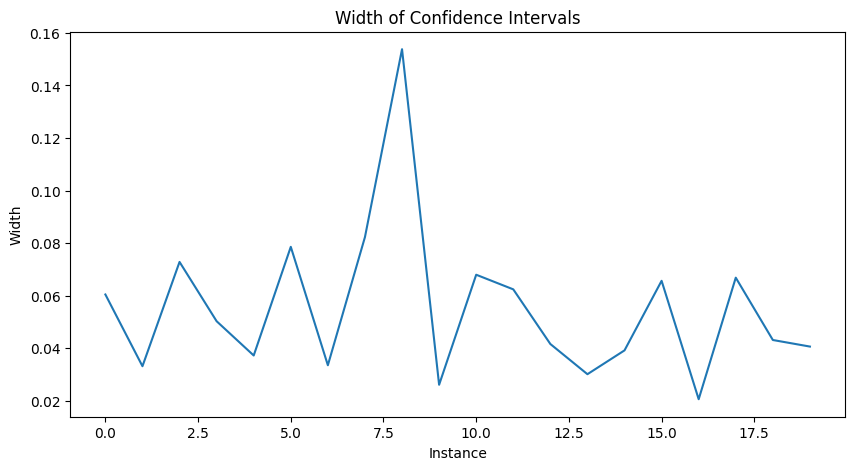

Proportion of Actual Values Within Confidence Intervals: 819      0.00
9188     0.30
6491     0.20
1870     0.30
7053     0.00
8488     0.35
1652     0.20
6832     0.35
7768     0.00
10227    0.30
2162     0.30
3924     0.30
573      0.50
7843     0.35
10502    0.30
2324     0.30
1505     0.40
5161     0.35
1644     0.00
7692     0.15
dtype: float64


In [29]:
# Interpretation of the results

# Calculate the width of the confidence intervals
interval_widths = confidence_intervals['upper'] - confidence_intervals['lower']

# Plot the width of the confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(interval_widths)
plt.title('Width of Confidence Intervals')
plt.xlabel('Instance')
plt.ylabel('Width')
plt.show()

# Calculate the proportion of actual values that fall within the confidence intervals
within_interval = confidence_intervals.apply(lambda row: (row['lower'] <= y_test) & (y_test <= row['upper']), axis=1)
proportion_within_interval = within_interval.mean()
print('Proportion of Actual Values Within Confidence Intervals:', proportion_within_interval)